In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [31]:
url = "https://raw.githubusercontent.com/enricochandran/01.-Machine-Learning/refs/heads/main/03.%20Week%203/Income/income.csv"
df = pd.read_csv(url)
print(df.head())

   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0             

In [32]:
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

X = df.drop(columns=['income'])
y = df['income']

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [33]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
y_prob_knn = knn.predict_proba(X_test)[:, 1]

In [34]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
y_prob_dt = dt.predict_proba(X_test)[:, 1]

In [35]:
def evaluate_model(y_test, y_pred, y_prob, model_name):
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred, average='weighted')
    rec = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    if y_prob.ndim == 2 and y_prob.shape[1] > 2:
        auc = roc_auc_score(y_test, y_prob, multi_class='ovr', average='weighted')
    else:
        auc = roc_auc_score(y_test, y_prob)
    return pd.Series({'Model': model_name, 'Accuracy': acc, 'Precision': prec, 'Recall': rec, 'F1 Score': f1, 'AUC': auc})

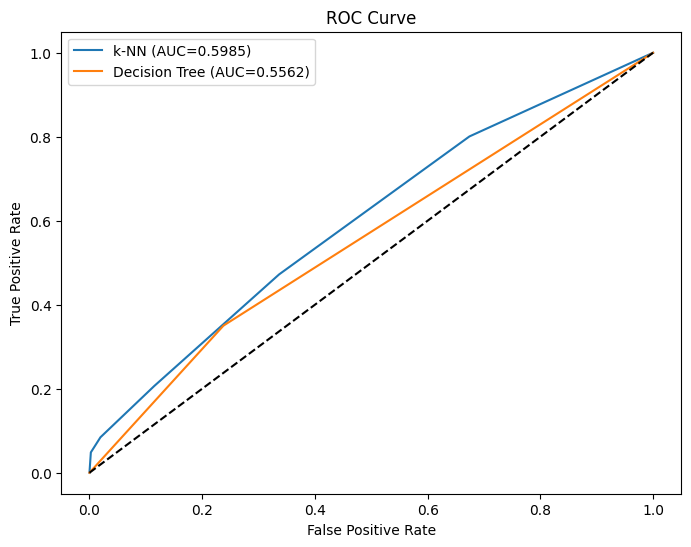

In [36]:
plt.figure(figsize=(8, 6))

for model, y_prob, label in zip([knn, dt], [y_prob_knn, y_prob_dt], ['k-NN', 'Decision Tree']):
    y_prob = np.array(y_prob)

    y_test_binary = (y_test == 1).astype(int)

    fpr, tpr, _ = roc_curve(y_test_binary, y_prob)
    auc = roc_auc_score(y_test_binary, y_prob)

    plt.plot(fpr, tpr, label=f'{label} (AUC={auc:.4f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [38]:
auc_knn = roc_auc_score(y_test_binary, y_prob_knn)
auc_dt = roc_auc_score(y_test_binary, y_prob_dt)

print(f'AUC Score k-NN: {auc_knn:.4f}')
print(f'AUC Score Decision Tree: {auc_dt:.4f}')

AUC Score k-NN: 0.5985
AUC Score Decision Tree: 0.5562


Berdasarkan AUC, k-NN adalah model yang lebih baik dibandingkan Decision Tree. Namun, karena AUC masih mendekati 0.5, ini menandakan model masih kurang baik.
Untuk meningkatkan performa, bisa dicoba:

*   Feature Engineering: Menambah atau memperbaiki fitur input.
*   Hyperparameter Tuning: Misalnya, mengubah jumlah neighbor pada k-NN atau kedalaman pohon pada Decision Tree.
*   Gunakan Model Lain: Seperti Random Forest atau SVM yang bisa lebih akurat.

# **1. Accuracy (Akurasi)**
Accuracy mengukur seberapa sering model melakukan prediksi yang benar (baik benar positif maupun benar negatif) dibandingkan dengan total prediksi.

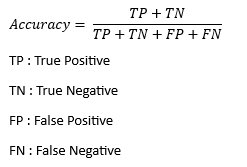

# **2. Precision (Presisi)**
Precision mengukur seberapa akurat model dalam memprediksi kelas positif. Ini adalah rasio prediksi benar positif (True Positives) terhadap semua prediksi positif (True Positives + False Positives).

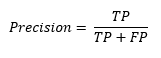

# **3. Recall (Sensitivity atau True Positive Rate)**
Recall mengukur seberapa baik model dapat mengidentifikasi semua instance positif. Ini adalah rasio prediksi benar positif (True Positives) terhadap semua instance positif yang sebenarnya (True Positives + False Negatives).

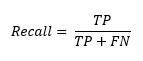

# **4. F1-Score**
F1-Score adalah harmonic mean dari Precision dan Recall. Ini memberikan keseimbangan antara Precision dan Recall.

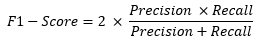

# **5. AUC (Area Under Curve)**

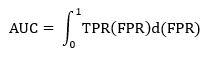


AUC adalah area di bawah kurva ROC. Nilainya berkisar antara 0 dan 1:
*   AUC = 1: Model sempurna.
*   AUC = 0.5: Model tidak lebih baik dari tebakan acak.
*   AUC < 0.5: Model performanya buruk.

# **6. ROC Curve (Receiver Operating Characteristic)**
Kurva ROC adalah plot antara True Positive Rate (TPR) vs False Positive Rate (FPR):

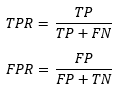

Semakin tinggi TPR dan semakin rendah FPR, semakin baik modelnya. Kurva yang mendekati sudut kiri atas berarti performa model sangat baik.